In [16]:
import matplotlib.pyplot as plt
import tensorflow as tf

from keras.models import Model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input

from numpy import expand_dims

from tensorflow.keras.applications import VGG19

### Load Model 

In [17]:
def load_vgg19()-> Model:
    vgg = VGG19(include_top=False, weights='imagenet')
    return vgg

### List of desired convolution layers

In [18]:
def create_list_of_vgg_layer():

    style_layer_names   = ['block1_conv1',
                           'block2_conv1',
                           'block3_conv1',
                           'block4_conv1',
                           'block5_conv1']

    return (style_layer_names)

### Create Custom Model with List of Features Maps as Output

In [19]:
def create_multi_output_model(style_layers : list)-> Model:

    vgg19 = load_vgg19()
    
    layers_name = style_layers
    layers_output = list()
    
    for name in layers_name:
        layer = vgg19.get_layer(name)
        output = layer.output
        layers_output.append(output)

    multi_output_model = Model([vgg19.input], layers_output)
    multi_output_model.trainable = False

    return (multi_output_model)

### Initialize Custom Model

In [4]:
style_layer = create_list_of_vgg_layer()
model = create_multi_output_model(style_layer)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

### Load and Pre-Process Image

In [6]:
img = load_img('../img/style/waves.png')
img = img_to_array(img)
img = expand_dims(img, axis=0)
input = preprocess_input(img)
input.shape

(1, 892, 874, 3)

### Get list of Features Maps of Img

In [8]:
feature_maps = model(img)

2022-11-22 07:23:53.326886: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.69GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-11-22 07:23:53.326945: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.69GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.


### Plot 1 Filter for each Features Maps 

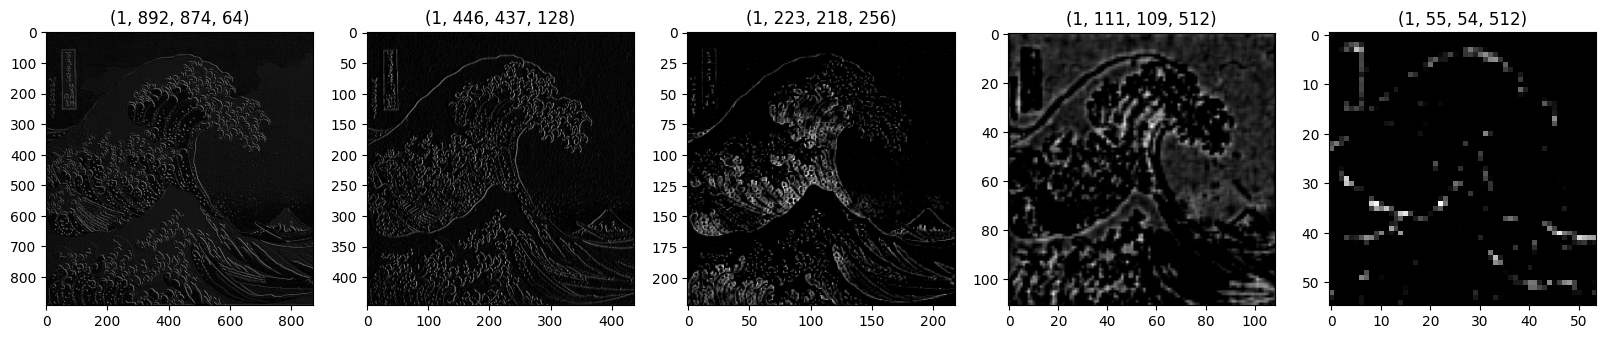

In [9]:
fig, ax = plt.subplots(1, 5, figsize=(20, 15))

i = 0
for f in feature_maps :
    ax[i].imshow(f[0, :, :, 4], cmap='gray')
    ax[i].set_title(f"{f.shape}")
    i += 1

### PLot 64 Filter for Each Features Maps

In [14]:
def plot_features_map(features_map):
    # plot the output from each block
    height = 8
    width = 8

    for map in feature_maps:
        # plot all 64 maps in an 8x8 squares
        place = 1
        for _ in range(height):
            for _ in range(width):
                # specify subplot and turn of axis
                ax = plt.subplot(height, width, place)
                ax.set_xticks([])
                ax.set_yticks([])
                # plot filter channel in grayscale
                plt.imshow(map[0, :, :, place-1], cmap='gray')
                place += 1
        # show the figure
        plt.show()

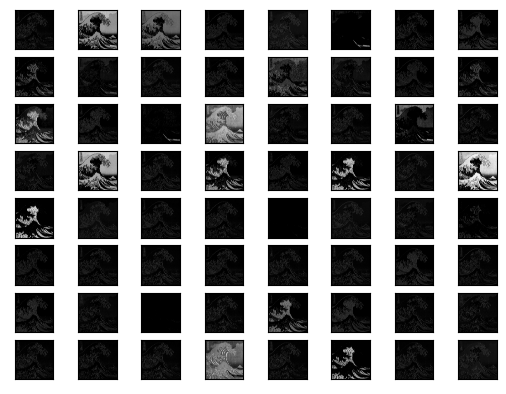

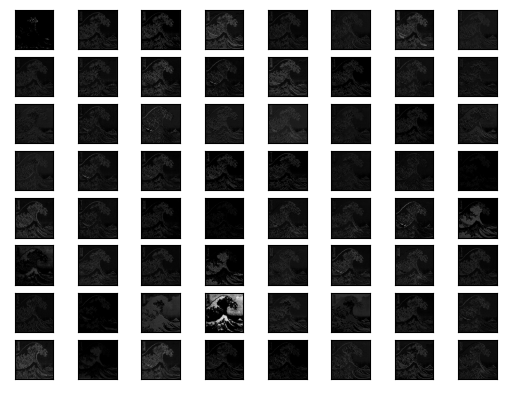

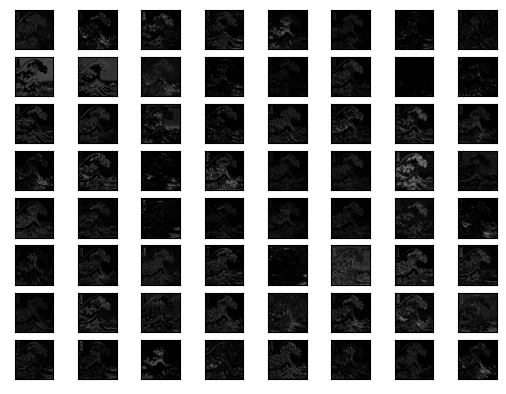

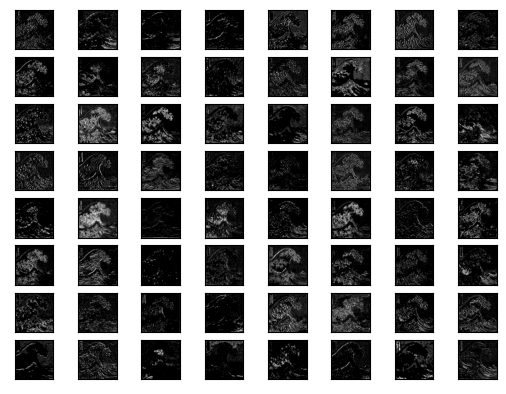

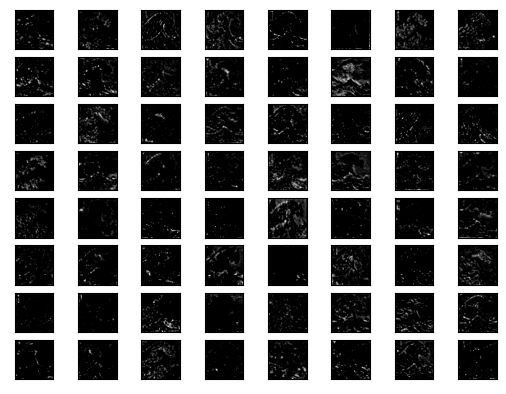

In [15]:
plot_features_map(feature_maps)